In [1]:
import cv2

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

In [11]:
image = Image.open("Desktop/deep learning/obj-detection1.jpeg")

In [13]:
numpydata = np.array(image)

In [14]:
print(type(numpydata))

<class 'numpy.ndarray'>


In [15]:
#image = cv2.imread("./obj-detection1.jpeg")

In [17]:
print(numpydata.shape)

(138, 366, 3)


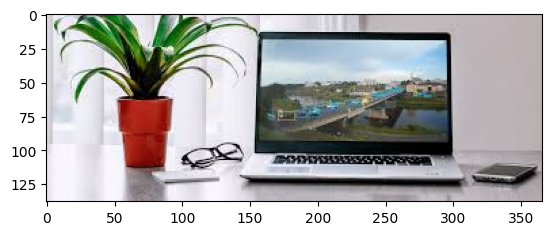

In [18]:
plt.imshow(image)

In [22]:
yolo = cv2.dnn.readNet("./yolov3-tiny.weights","./yolov3-tiny.cfg")


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\darknet\darknet_importer.cpp:210: error: (-212:Parsing error) Failed to open NetParameter file: ./yolov3-tiny.cfg in function 'cv::dnn::dnn4_v20230620::readNetFromDarknet'


In [ ]:
classes = []
with open(".\coc.names",'r') as f:
    classes = f.read().splitlines()

In [ ]:
len(classes)

In [ ]:
 img = cv2.imread("Desktop/deep learning/obj-detection1.jpeg")

In [ ]:
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop =False)

In [ ]:
blob.shape

In [ ]:
i = blob[0].reshape(320,320,3)
plt.imshow(i)

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layers_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [ ]:
box = []
confidence = []
class_ids = []

for output in layeroutput:
    for detection in output:
        score = detection[5:]
        class_id = np.argmax(score)
        confidence = score[class_id]
        if confidence > 0.7:
            center_x = int(detection[0]*width)
            center_x = int(detection[0]*height)
            w = int(detection[0]*width)
            h = int(detection[0]*height)        
        
            x= int(center_x-w/2)
            y = int(center_y-h/2)

            boxes.append([x,y,w,h])
            confidence.append(float(confidence))
            class_ids.append(class_id)

In [ ]:
len(boxes)

In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes,confidence,0.5,0.4)

In [ ]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255,size = (len(boxes),3))